In [1]:
# this package contains a bunch of functions useful for reading, plotting and working with data recorded in .paq files

import sys; sys.path.append('/home/pshah/Documents/code/Vape/utils')
# import alloptical_utils_pj as ao
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from paq_utils import *
# from scipy.stats import pearsonr
# from scipy.signal import savgol_filter
#
# import tifffile as tf
# import pickle as pkl

import matplotlib as mpl
# import matplotlib.pyplot as plt
# mpl.use('TkAgg')  # or can use 'TkAgg', whatever you have/prefer
import plotly.graph_objects as go


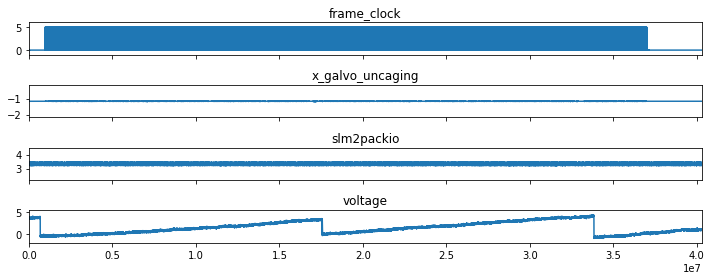

In [2]:
input_path = "/home/pshah/mnt/qnap/Data/2020-12-18/2020-12-18_RL108_001.paq"

paq, paq_df = paq_read(input_path, plot=True)

voltage = paq['data'][3]

ValueError: Big-endian buffer not supported on little-endian compiler

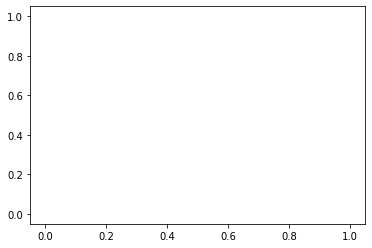

In [3]:
import seaborn as sns
sns.scatterplot(data=paq_df, x = paq_df.index[:1000], y=paq_df.voltage[:1000])

In [3]:
def plot_paq_interactive(paq, input_path, channels_to_plot=None):
    name = input_path[input_path.find('/20', 30)+1:len(input_path)]  # note that the arguments for find here are very arbitrary, might break in some circumstances
    # Create figure

    # set layout
    layout = go.Layout(
        title="LFP - Voltage series - %s" % name,  # set title as the full name of the .paq file
        plot_bgcolor="#FFF",  # Sets background color to white
        hovermode='x',
        hoverdistance=10,
        spikedistance=1000,
        xaxis=dict(
            title="time",
            linecolor="#BCCCDC",  # Sets color of X-axis line
            showgrid=False,  # Removes X-axis grid lines
            # rangeslider=list(),

            # format spikes
            showspikes=True,
            spikethickness=2,
            spikedash='dot',
            spikecolor="#999999",
            spikemode='across'
        ),
        yaxis=dict(
            title="price",
            linecolor="#BCCCDC",  # Sets color of Y-axis line
            showgrid=False,  # Removes Y-axis grid lines
            fixedrange=False,
            rangemode='normal'
        )
    )

    fig = go.Figure(data=go.Scatter(x=list(range(paq['num_datapoints'])), y=paq['data'][3], line=dict(width=0.95)),
                    # downsampling data by 10,
                    layout=layout)

    # fig.update_traces(hovertemplate=None)

    # fig.add_trace(
    #     go.Scatter(x=list(t[::10]), y=list(V[0][::10]), line=dict(width=0.75)))  # downsampling data by 10

    # Add range slider
    fig.update_layout(
        xaxis=dict(
            rangeslider=dict(
                visible=True
            ),
            type="linear"
        )
    )

    fig.show()


In [9]:
import plotly.express as px

def plot_paq_interactive_line(paq_df, input_path, channels_to_plot=None):
    name = input_path[input_path.find('/20', 30)+1:len(input_path)]  # note that the arguments for find here are very arbitrary, might break in some circumstances
    # Create figure

    # set layout
    layout = go.Layout(
        title="LFP - Voltage series - %s" % name,  # set title as the full name of the .paq file
        plot_bgcolor="#FFF",  # Sets background color to white
        hovermode='x',
        hoverdistance=10,
        spikedistance=1000,
        xaxis=dict(
            title="time",
            linecolor="#BCCCDC",  # Sets color of X-axis line
            showgrid=False,  # Removes X-axis grid lines
            # rangeslider=list(),

            # format spikes
            showspikes=True,
            spikethickness=2,
            spikedash='dot',
            spikecolor="#999999",
            spikemode='across'
        ),
        yaxis=dict(
            title="price",
            linecolor="#BCCCDC",  # Sets color of Y-axis line
            showgrid=False,  # Removes Y-axis grid lines
            fixedrange=False,
            rangemode='normal'
        )
    )

    fig = px.line(paq_df, x=paq_df.index, y="voltage", title='Life expectancy in Canada')
    fig.show()

    # fig.update_traces(hovertemplate=None)

    # fig.add_trace(
    #     go.Scatter(x=list(t[::10]), y=list(V[0][::10]), line=dict(width=0.75)))  # downsampling data by 10

    # Add range slider
    fig.update_layout(
        xaxis=dict(
            rangeslider=dict(
                visible=True
            ),
            type="linear"
        )
    )

    fig.show()
    

In [10]:
plot_paq_interactive_line(paq_df=paq_df, input_path=input_path)

ValueError: Big-endian buffer not supported on little-endian compiler